## Problem Statement

The new covid-era has provided a new way of living the work-life balance. We have seen a lot of different websites providing packages to work from different locations. From Kashmir to Kanyakumari, from Gujarat to Assam we have collected packages in and around India. It becomes really difficult to find the best place with all the amenities such as high-speed internet, a comfortable stay as well as within the budget. To solve the real-world problem of finding the best deals for a calm and enjoying workation trip. Workation is the best way to work at a remote location with a recreational and rejuvenating vacation for the team.

In this competition, one has to use the knowledge of machine learning, deep learning, and model building to predict the price per person for your next workstation trip. The data has more than 18000+ rows of different packages with the details like start location, hotel type, cost per person, destination, Itinerary, and many more.

### Data Dictionary

- Uniq Id - Unique Identifier per row sample
- Package Name - Name of the tour package
- Package Type - Type of the tour package
- Destination - A destination place
- Itinerary - complete itinerary
- Places Covered - covered places in the itinerary
- Travel Date - Date of travel
- Hotel Details - Details of the hotel stay
- Start City - Start place for the travel
- Airline - Flight details
- Flight Stops - Intermediate stops if any
- Meals - Inflight meals or services
- Sightseeing Places Covered - Itinerary details regarding sightseeing
- Cancellation Rules - Cancellation policy as per travel company
- Per Person Price - Price of the tour package per person (Target Column)

In [136]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import word2number as w2n
import regex
import re

from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')

In [6]:
data = pd.concat([train_data,test_data], ignore_index = False)
data.head()

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0


In [7]:
train_data.shape, test_data.shape, data.shape

((21000, 15), (9000, 14), (30000, 15))

In [8]:
data['Travel Date'] = pd.to_datetime(data['Travel Date'], dayfirst = True)

In [9]:
# Splitting the Travel Date column into three columns, day, month, year
data['day'] = data['Travel Date'].dt.day
data['month'] = data['Travel Date'].dt.month
data['year'] = data['Travel Date'].dt.year

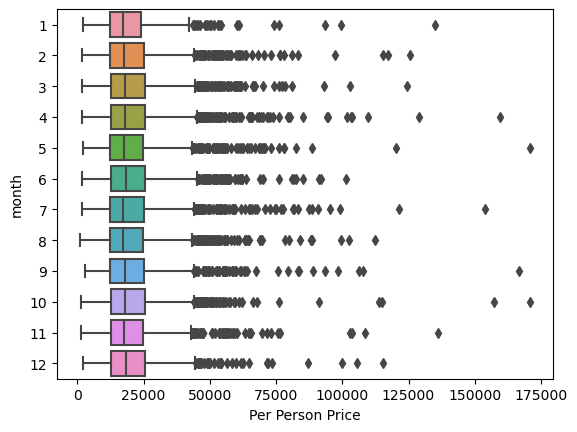

In [10]:
# checking their realtionship of these columns with taregt variable
sns.boxplot(x = data['Per Person Price'], y = data['month'], orient = 'h');

In [11]:
data.groupby(by = 'month')['Per Person Price'].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,727.0,19457.711142,11702.659817,2139.5,12141.250,17143.00,24147.750,134981.0
2,1523.0,20245.471110,12289.278206,1639.5,12408.250,17505.00,25128.500,125611.5
3,1856.0,20169.845097,11360.439346,1757.0,12624.000,17855.00,25548.125,124621.0
4,2004.0,20599.283932,12645.791583,1639.5,12591.375,18014.50,25572.125,159740.0
5,2128.0,19805.186090,11412.252405,2107.0,12379.000,17428.50,24714.750,171062.5
6,2003.0,20289.622067,11250.624557,1797.0,12524.500,18155.50,25516.750,101423.5
7,2110.0,20068.149052,11855.227941,1797.0,12375.750,17358.50,25126.750,153795.0
8,2052.0,19624.855994,11214.868561,791.0,12160.625,17284.00,24602.750,112493.5
9,1877.0,19909.449387,11677.682263,2866.5,12440.500,17802.00,25063.000,166758.0


In [12]:
data['Season'] = data.month.apply(lambda x : 'Peak_Month' if x in [1,4,5,7,9,10,11] else 'Normal')

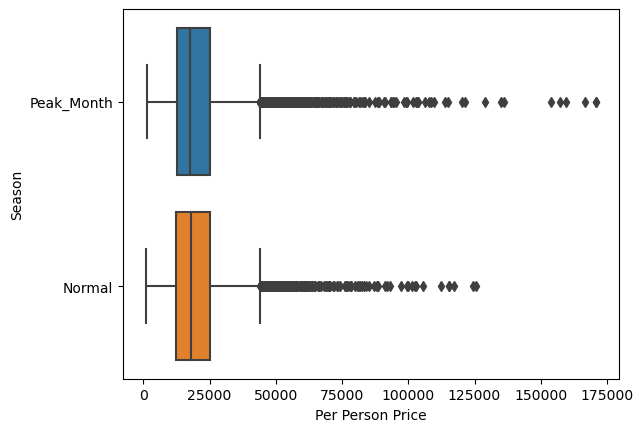

In [13]:
sns.boxplot(x = data['Per Person Price'], y = data['Season'], orient = 'h');

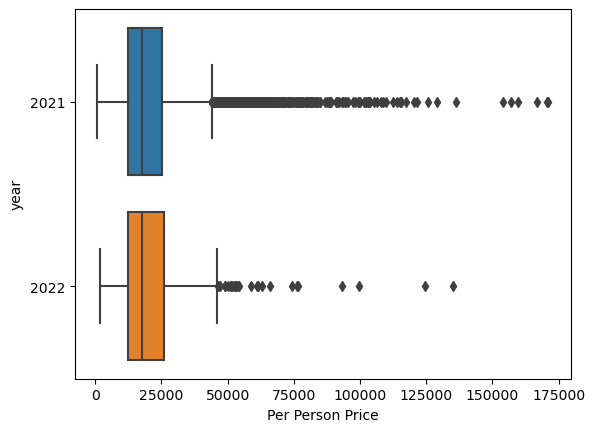

In [14]:
# Let's check for the pattern in year
sns.boxplot(x = data['Per Person Price'], y = data['year'], orient = 'h');

In [15]:
data['WeekDay'] = data['Travel Date'].dt.weekday

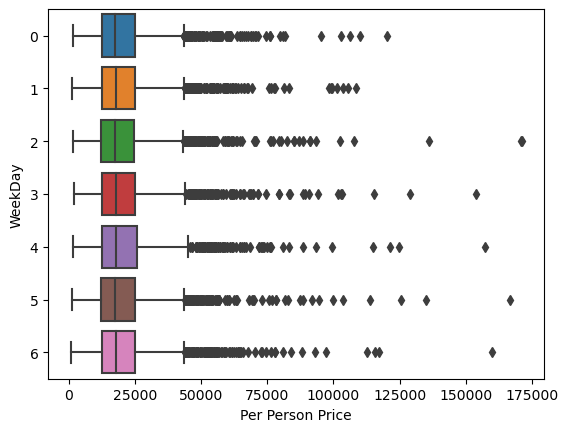

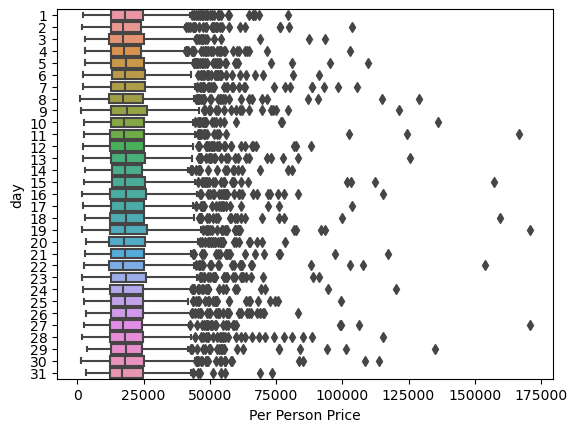

In [16]:
# Let's compare both the day and day Of week.
plt.figure(1)
sns.boxplot(x = data['Per Person Price'], y = data['WeekDay'], orient = 'h');

plt.figure(2)
sns.boxplot(x = data['Per Person Price'], y = data['day'], orient = 'h')

plt.show()
# day - 5, 8,10, 11, 15, 18, 19, 22, 27, 29, 30

In [17]:
data['Day_Season'] = data.day.apply(lambda x : 'Peak_days' if x in [5, 8,10, 11, 15, 18, 19, 22, 27, 29, 30]
              else 'Normal_days')

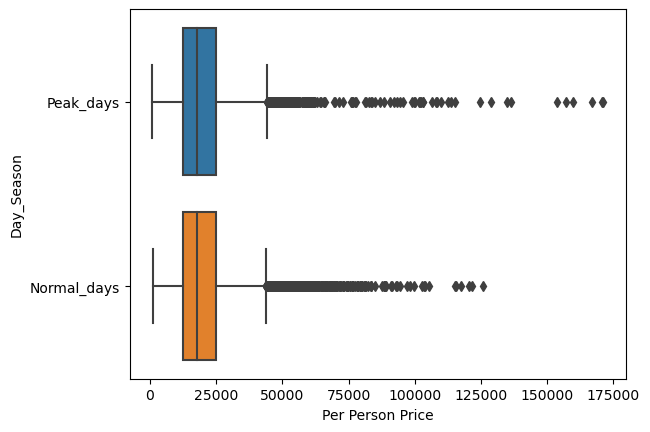

In [18]:
sns.boxplot(x = data['Per Person Price'], y = data['Day_Season'], orient = 'h');
# perfecto

<Axes: xlabel='Per Person Price', ylabel='Meals'>

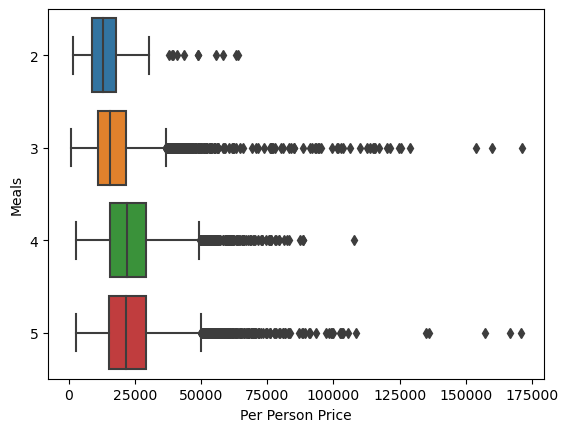

In [19]:
sns.boxplot(x = data['Per Person Price'], y = data['Meals'], orient = 'h')

In [20]:
data['Flights'] = data['Airline'].str.split('|', expand = True)[0]

<Axes: xlabel='Per Person Price', ylabel='Flights'>

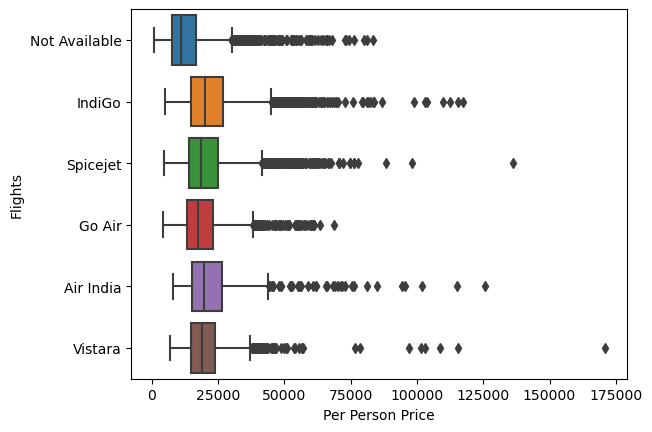

In [21]:
sns.boxplot(y = data.loc[data['Flights'].isin(data.Flights.value_counts()[:6].index.to_list()), 
                         'Flights'], x = data.loc[data['Flights'].isin(data.Flights.value_counts()[:6].index.to_list()), 
                         'Per Person Price'], orient = 'h')

In [22]:
data['LocationCount'] = data['Places Covered'].apply(lambda x : len(x.split('|')))

In [23]:
# Extracting the column TavelDaysCount
combined_series = []
for i in range(0,11):
    ser = data['Itinerary'].str.split('.', expand = True)[i].str.split('N', expand = True)[0].apply( 
    lambda x : 0 if (x == None) else x).astype(int)
    combined_series.append(ser)
    
data['TravelDaysCount'] = pd.concat(combined_series, axis = 1, keys = range(0,11)).sum(axis = 1)

# data['TravelDaysCount'] = final[0]+ final[1] + final[2] + final[3] + final[4] + final[5] + final[6]

<Axes: xlabel='Per Person Price', ylabel='TravelDaysCount'>

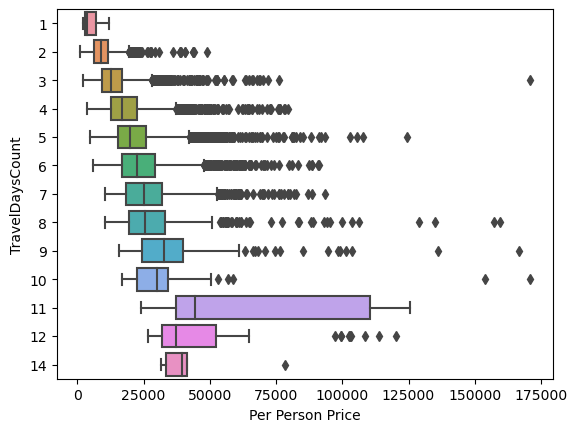

In [24]:
sns.boxplot(y = data['TravelDaysCount'], x = data['Per Person Price'], orient = 'h')

In [25]:
data['Package Name'].value_counts()

Bali Special 4 Nights                                           53
Holiday in Manali & Chandigarh from Chandigarh                  52
Getaway to the Hills of Kodaikanal from Madurai                 46
Serene Uttarakhand with Kausani                                 44
Amazing Kerala                                                  44
                                                                ..
Jaipur, Ranthambhore, and Udaipur - Oberoi Wildlife Special      1
Short Getaway to Patlidun Safari Lodge in Corbett from Delhi     1
Luxury Weekend Getaway in Corbett                                1
Singapore With Genting Dream Cruise                              1
Ladakh Holiday with Pangong Excursion (With Flights)             1
Name: Package Name, Length: 2236, dtype: int64

In [226]:
w2n = {'One':1, 'Two':2, 'Three':3, 'Four':4, 'Five':5, 'Six':6, 'Seven':7, 'Eight':8, 'Nine':9
      , '':0, 'A member of The Leading Hotels Of The World':0}
ratings = []
final_ratings = []
for i in range(10):
    ser = data['Hotel Details'].str.split('|', expand = True)[i].str.split(':', expand = True)[1].apply(lambda x : 0 if x is None else x).replace(w2n)
    ratings.append(ser.astype(float))
    
for i in range(data.shape[0]):
    rate = np.mean(pd.concat(ratings,axis = 1, keys = range(10)).iloc[i,:].apply(lambda x : x if x != 0 else None))
    final_ratings.append(rate)
    
data['final_ratings'] = final_ratings
# bool(re.match(r"^\d+\.?\d*$",str(a)))    

In [239]:
data.final_ratings.fillna(0, inplace = True)

In [31]:
data['SightSeeing_Count'] = data['Sightseeing Places Covered'].apply(lambda x : 0 if x == 'Not Available' else 
                                        len(x.split('|')))

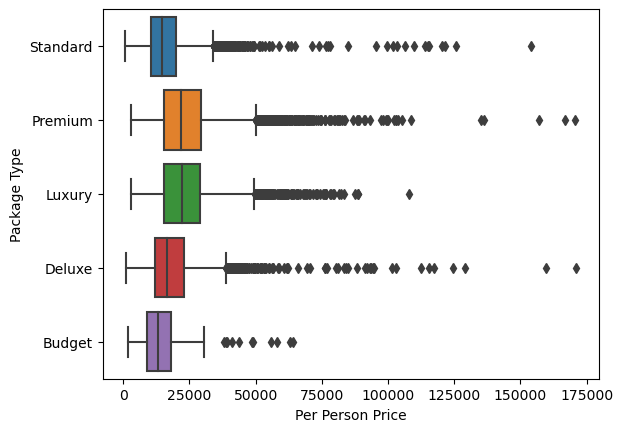

In [34]:
sns.boxplot(x = data['Per Person Price'], y = data['Package Type'], orient = 'h');

In [38]:
data['Package Type'].replace({'Luxury':5, 'Premium':4, 'Deluxe':3, 'Standard':2, 'Budget':1}
                            , inplace = True)

In [42]:
data['HotelCount'] = data['Hotel Details'].apply(lambda x : 0 if x == 'Not Available' else len(x.split('|')))

In [43]:
data['Package Name'].value_counts()

Bali Special 4 Nights                                           53
Holiday in Manali & Chandigarh from Chandigarh                  52
Getaway to the Hills of Kodaikanal from Madurai                 46
Serene Uttarakhand with Kausani                                 44
Amazing Kerala                                                  44
                                                                ..
Jaipur, Ranthambhore, and Udaipur - Oberoi Wildlife Special      1
Short Getaway to Patlidun Safari Lodge in Corbett from Delhi     1
Luxury Weekend Getaway in Corbett                                1
Singapore With Genting Dream Cruise                              1
Ladakh Holiday with Pangong Excursion (With Flights)             1
Name: Package Name, Length: 2236, dtype: int64

In [47]:
data['Cancellation Rules'].value_counts()

Cancellation any time after making the 1st payment instalment till the 2nd payment date:The entire amount paid as 1st payment instalment (deposit) would be non-refundable.Cancellation after 2nd payment instalment and before 3rd or final payment date:The total amount that was due at the 2nd payment instalment as per your payment schedule would be non-refundable; anything that you have paid over and above this amount would be refundable.Cancellation after 3rd or final payment date:The full amount paid by you would be non-refundable.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                